In [54]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sn



In [73]:
df = pd.read_csv('../data/fraud.csv')

In [72]:
df.drop(columns=['ratio_to_median_purchase_price']).to_csv('../data/fraud.csv', index=False)

In [74]:
df.head()

,distance_from_home,distance_from_last_transaction,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,1.0,1.0,0.0,1.0,0.0


distance_from_home


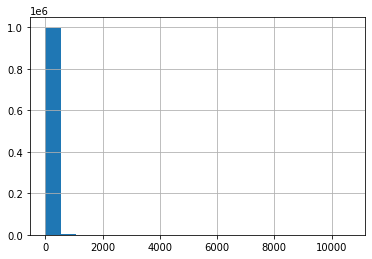

distance_from_last_transaction


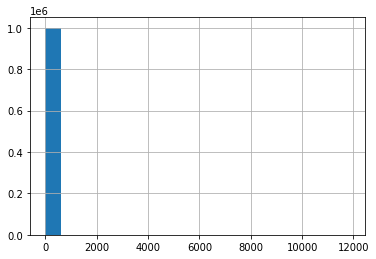

repeat_retailer


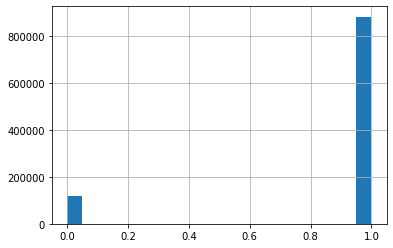

used_chip


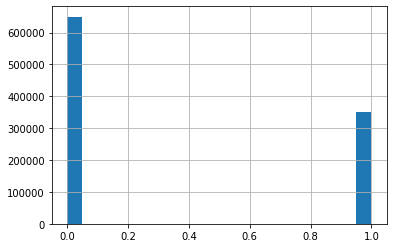

used_pin_number


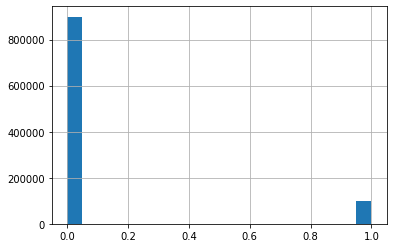

online_order


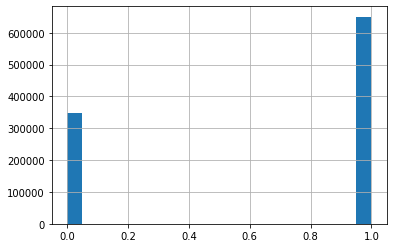

fraud


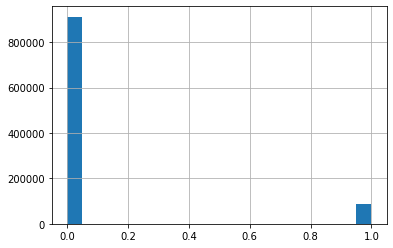

In [75]:
for c in df.columns:
    print(c)
    df[c].hist(bins=20)
    plt.show()

In [89]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [91]:
1-(87403/912597)

0.9042260713107757

In [76]:
X = df.drop(columns=['fraud'])
y = df['fraud']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [78]:
tree = DecisionTreeClassifier(random_state=42)

In [79]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
forest.score(X_train, y_train)

0.9678866666666667

In [81]:
forest.score(X_test, y_test)

0.9122914285714285

In [82]:
forest.feature_importances_

array([0.39901771, 0.30978349, 0.00063989, 0.09578286, 0.05294094,
       0.14183512])

In [83]:
forest.feature_names_in_

array(['distance_from_home', 'distance_from_last_transaction',
       'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
      dtype=object)

In [84]:
tree.get_depth()

107

In [85]:
predictions = forest.predict(X_test)

<AxesSubplot:>

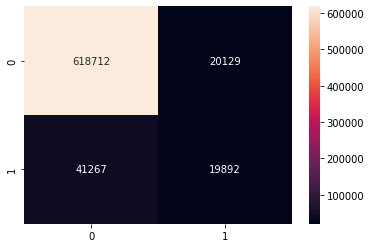

In [86]:
cm = confusion_matrix(y_test, predictions)
sn.heatmap(cm, annot=True, fmt='g')